# Data Viz

In [24]:
## ------------------------Installing libraries------------------------------------------------
# Install from CRAN
#install.packages("tidyverse")
#install.packages("lubridate")

In [63]:
##______________________________ LOADING LIBRARIES________________________
library(readr)
library(tidyverse)
library(lubridate)

In [64]:
# Functions

## This function reads csv data files
read_data <- function(filename, delim_f, skip_f) {
    
    ## Read data file
    data <- read_delim(filename, delim=delim_f, skip=skip_f,
                   col_names=c("datetime","O3","NO2","SO2","CO","PM10","TEMP","PREC","RAD"), show_col_types = FALSE)
    # show_col_types = TRUE shows the column types to explicit what each column contains

    return(data)
}

In [65]:
## Specify settings
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [66]:
## ------------------LOADING DATA------------------------------------------------------
## Define input file (located in same directory)
BASEL <- "./Data/BAS.csv"
file.exists(BASEL)

DAVOS <- "./Data/DAV.csv"
file.exists(DAVOS)

[1] TRUE

[1] TRUE

In [67]:
##____________________READING DATA_____________
#DAVOS_data <- read_data(DAVOS, ";", 6)
DAVOS_data <- read_delim(DAVOS, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","PM10","NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# BASEL_data <- read_data(BASEL, ";", 6)
## Read data file
BASEL_data <- read_delim(BASEL, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","SO2","PM10","PM2.5","EC", "CPC", "NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# show_col_types = TRUE shows the column types to explicit what each column contains


In [68]:
## ------------------------------------------------------------------------
## View information stored in object
cat("Davos dataset:\n")
str(DAVOS_data)

cat("\nBasel dataset:\n")
str(BASEL_data)

Davos dataset:
spc_tbl_ [8,784 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ datetime: chr [1:8784] "01.01.2024 01:00" "01.01.2024 02:00" "01.01.2024 03:00" "01.01.2024 04:00" ...
 $ O3      : num [1:8784] 57.7 55.2 49.9 52.1 65.8 67.1 64 58.4 61.8 59 ...
 $ NO2     : num [1:8784] 1.9 2.1 3.7 4.5 0.7 0.7 3.4 5.4 1.7 2.9 ...
 $ PM10    : num [1:8784] 1.2 1.5 2.2 3 0.2 0.4 0.3 0.3 0.3 0.4 ...
 $ NOx     : num [1:8784] 1.9 2.1 3.7 4.6 0.7 0.7 3.5 5.4 1.8 3.4 ...
 $ TEMP    : num [1:8784] -2.2 -2.8 -3.3 -4.2 -5.2 -5.6 -5.7 -5.9 -5.7 -5.3 ...
 $ PREC    : num [1:8784] 0 0 0 0 0 0 0 0 0 0 ...
 $ RAD     : num [1:8784] -0.6 -0.7 -0.7 -1.1 -1.3 -0.8 -0.6 -0.6 22.6 73.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   datetime = col_character(),
  ..   O3 = col_double(),
  ..   NO2 = col_double(),
  ..   PM10 = col_double(),
  ..   NOx = col_double(),
  ..   TEMP = col_double(),
  ..   PREC = col_double(),
  ..   RAD = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 

Basel dataset:
spc_tbl

In [69]:
## ------------------------------------------------------------------------
## View first 6 lines
cat("
head(DAVOS_data)
head(BASEL_data)

datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6
01.01.2024 02:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7
01.01.2024 03:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7
01.01.2024 04:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1
01.01.2024 05:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3
01.01.2024 06:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8


datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0
01.01.2024 02:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0
01.01.2024 03:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0
01.01.2024 04:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0
01.01.2024 05:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2
01.01.2024 06:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0


In [70]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column
data$datetime <- parse_date_time(data$datetime, "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Extract the month
data[["month"]] <- month(data[["datetime"]])

# Extract the date (without time)
data[["date"]] <- date(data[["datetime"]])

# Check the results
head(data)


Warning message:
" 1 failed to parse."


datetime,O3,NO2,CO,PM10,TEMP,PREC,RAD,X9,X10,X11,X12,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0,1,2024-01-01
2024-01-01 02:00:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0,1,2024-01-01
2024-01-01 03:00:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0,1,2024-01-01
2024-01-01 04:00:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0,1,2024-01-01
2024-01-01 05:00:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2,1,2024-01-01
2024-01-01 06:00:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0,1,2024-01-01


In [13]:
## ------------------------------------------------------------------------
## View modified data table
str(data)
head(data)

spc_tbl_ [8,784 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ datetime: POSIXct[1:8784], format: "2024-01-01 01:00:00" "2024-01-01 02:00:00" ...
 $ O3      : num [1:8784] 60.2 70 70.3 67 66.5 67.1 70.1 71.7 64.6 67.6 ...
 $ NO2     : num [1:8784] 7.5 1.9 1.5 1.3 2 2.7 2 1.5 2.6 2.1 ...
 $ CO      : num [1:8784] 1.6 0.7 0.4 0.3 0.3 0.3 0.2 0.2 0.2 0.2 ...
 $ PM10    : num [1:8784] 35.8 7.2 3.7 2 2.9 4.6 3.1 4.6 4.8 5.7 ...
 $ TEMP    : num [1:8784] 25.2 4.4 1.8 1 1.4 2.1 1.5 2.1 2.1 2.5 ...
 $ PREC    : num [1:8784] 0.4 0.1 0 0 0.1 0.1 0 0 0 0.1 ...
 $ RAD     : num [1:8784] 10341 2394 1341 1173 1308 ...
 $ X9      : num [1:8784] 8.7 2.5 2.1 2 2.7 3.3 2.8 2.3 3.4 2.9 ...
 $ X10     : num [1:8784] 5.5 6.6 5.7 5.7 5.7 5.9 6.1 6.6 5.5 6.8 ...
 $ X11     : num [1:8784] 0 0 1.4 0 0 0 0 0 0 0 ...
 $ X12     : num [1:8784] 0 0 0 0 0.2 0 0 0 14.5 95.5 ...
 $ month   : num [1:8784] 1 1 1 1 1 1 1 1 1 1 ...
 $ date    : Date[1:8784], format: "2024-01-01" "2024-01-01" ...
 - attr(*, "spec")=
  .

datetime,O3,NO2,CO,PM10,TEMP,PREC,RAD,X9,X10,X11,X12,month,date
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2024-01-01 01:00:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0,1,2024-01-01
2024-01-01 02:00:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0,1,2024-01-01
2024-01-01 03:00:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0,1,2024-01-01
2024-01-01 04:00:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0,1,2024-01-01
2024-01-01 05:00:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2,1,2024-01-01
2024-01-01 06:00:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0,1,2024-01-01


Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


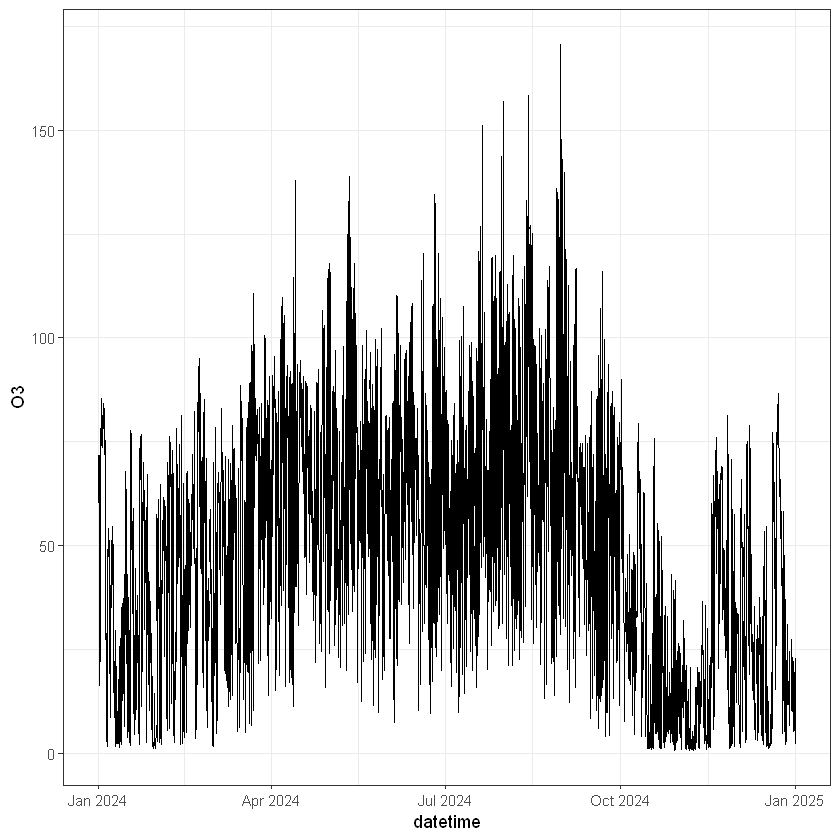

In [14]:
## ---- fig.width=8, fig.height=5------------------------------------------
ggplot(data)+
  geom_line(aes(datetime, O3))

In [15]:
## Save graphics to an object.
ggp <- ggplot(data)+
  geom_line(aes(datetime, O3))


In [16]:
## Print to pdf file.
pdf("outputs/fig1.pdf")
print(ggp)
dev.off()


Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


png 
  2